In [1]:
import seaborn as sns 
import pandas as pd 
import random
import numpy as np
import time
import matplotlib.pyplot as plt
import torch

sns.color_palette('colorblind')
penguins = sns.load_dataset("penguins")

/home/adrian/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from mab import eps_bandit
from newenv import RLIAEnv 
from contextualMab import contextual_bandit

env = RLIAEnv() 

kind_experiment = { 
    0: "Random",
    1: "MAB",
    2: "Contextual_MAB",
}

chosen_strategy = { 
    0: "9x9",
    1: "25x25",
    2: "Exaustive search",
}

def appendToDf(df, type, ts_begin, ts_end, spectral_efficiency, episode, reward, strategy):
    df.loc[len(df)] = [type, kind_experiment[type],ts_begin, ts_end, ts_end-ts_begin, spectral_efficiency, episode, reward, strategy, chosen_strategy[strategy]]



episodes = 2000
training_episodes = 2000 



/home/adrian/.local/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(


In [5]:
 #Training MAB
eps=.4
mab_agent = eps_bandit(k=3, eps=eps, iters=training_episodes) 

actions = ["9beam", "25beam", "exhaustive"]

env.sweep(env.codebook)

for i in range(training_episodes):
    # premeasure is taken before the agent takes an action
    prestate = env.sweep(env.codebook)
    # reference beam id is saved to be used in the next step
    previd = prestate[1]
    #     #moving the UE y coordinate +1 degree every training episode
    for j in range(24):
        if env.ue_loc[1] ==6:
                env.ue_loc[1] = 0
        else:
            env.ue_loc[1] = env.ue_loc[1]+1
        action = mab_agent.act(eps)
        _ , r, _ , _ = env.step(action)
        print("action: ", actions[action])
        print("reward: ", r)
        print("uecloc: ", env.ue_loc)
        print("                       ")
#         # Collect reward.
        env.preid = env.state[1]
        mab_agent.learn(reward=r, action=action) 

# Training Contextual MAB    
# eps=.1
# #print(env.state)
# lr= 0.001
# contextual_agent = contextual_bandit(k=4, eps=eps, iters=training_episodes, hidden_size=32, 
#     state_size=2, learning_rate=lr)  
# prevdis = 0

# for i in range(training_episodes):
#     #moving the UE y coordinate +1 degree every training episode
#     if env.ue_loc[1] == 15:
#         env.ue_loc[1] = -15
#     else:
#         env.ue_loc[1] = env.ue_loc[1]+1
#     # premeasure is taken before the agent takes an action
#     prestate = env.sweep(env.codebook)
#     # reference beam id is saved to be used in the next step
#     previd = prestate[1]
#     for j in range(30):
#         flat_state = np.array((env.state[0], env.state[1]), dtype = float)
#         action = contextual_agent.act(flat_state,eps)
#         print("action: ", action)
#         #print("distance: ", env.bsuedis)
#         #print("differential: ", env.state[1])
#         print("signal strength: " ,env.state[0])
#         _ , r, _ , _ = env.step(action, previd)
#         print(r)
#         # Collect reward.
#         #P contextual_agent.learn(reward=r, state=flat_state, action=action)
#         contextual_agent.learn(reward=r, state=flat_state, action=action)
#         previd = env.state[1]
#         #print("bsuedis: ", bsuedis)



EXPLOIT
action:  9beam
reward:  5.276410377172767
uecloc:  [15, 3]
                       
LEARN 0.0
mean 5.276410377172767
LEARN after 5.276410377172767 
------

action:  exhaustive
reward:  9.211324182766676
uecloc:  [15, 4]
                       
LEARN 0.0
mean 7.243867279969722
LEARN after 9.211324182766676 
------

EXPLOIT
action:  exhaustive
reward:  9.031269091692026
uecloc:  [15, 5]
                       
LEARN 9.211324182766676
mean 7.839667883877157
LEARN after 9.121296637229351 
------

action:  exhaustive
reward:  9.27324562902207
uecloc:  [15, 6]
                       
LEARN 9.121296637229351
mean 8.198062320163384
LEARN after 9.171946301160258 
------

EXPLOIT
action:  exhaustive
reward:  9.82471989593555
uecloc:  [15, 0]
                       
LEARN 9.171946301160258
mean 8.523393835317817
LEARN after 9.33513969985408 
------

EXPLOIT
action:  exhaustive
reward:  9.40004429431019
uecloc:  [15, 1]
                       
LEARN 9.33513969985408
mean 8.669502245149879
L

KeyboardInterrupt: 

In [ ]:
epinumcmab = 0
epinummab = 0
epinumrand = 0

measurements = pd.DataFrame(columns=["type",  "type_str",
                  "ts_begin", "ts_end", "ts_diff", "spectral_efficiency", "episode", "reward", "strategy", "strategy_str", "distance"]) 


# random measurement
# type_measurement = 0
# for episode in range(episodes):
#     a = random.randint(1, 6)*10
#     e = random.randint(0, 6)*10
#     f = random.randint(0, 6)*10
    #resetting location of UE every training episode
    # location= np.array([0, 10, 0])
    #randomizing the distance between UE and BS every training episode
    # bsuedis = 3.5
    #random.uniform(3.5, 15.5)
    #incrementing angle by 10 degrees every training episode

    # prestate = env.sweep(env._bs_antenna.codebook_ids, location, -45, bsuedis)
    # previd = prestate[1]
    # for j in range(10):
    #     if env.phiid == 45:
    #             env.phiid = -45
    #     else:
    #         env.phiid = env.phiid+10    
            
    #     ts_begin = time.process_time()
    #     action = env.action_space.sample() 
    #     print((action))
    #     observation, reward, _, _ = env.step(action, previd, bsuedis, location, maxthresh)
    #     ts_end = time.process_time()
    #     epinumrand = epinumrand+1 
    #     appendToDf(df=measurements, type=type_measurement,ts_begin=ts_begin, ts_end=ts_end, spectral_efficiency=observation[0], episode = epinumrand, reward=reward, strategy=int(action), distance=env.state[2])
        
    

# # MAB measurement
# print("MAB:")
# type_measurement = 1
# for _ in range(episodes):
#     a = random.randint(1, 6)*10
#     e = random.randint(0, 6)*10
#     f = random.randint(0, 6)*10
    #resetting location of UE every training episode
    # location= np.array([0, 10, 0])
    #randomizing the distance between UE and BS every training episode
    # bsuedis = 3.5
    #random.uniform(3.5, 15.5)
    #incrementing angle by 10 degrees every training episode

    # prestate = env.sweep(env._bs_antenna.codebook_ids, location, -45, bsuedis)
    # previd = prestate[1]
    # maxthresh = prestate[2]
#      #Estimate channel.
    # for j in range(10):
    #     if env.phiid == 45:
    #             env.phiid = -45
    #     else:
    #             env.phiid = env.phiid+10

    #     ts_begin = time.process_time()
    #     action = mab_agent.act()
    #     print(action)
    #     observation, reward, _, _ = env.step(action, previd, bsuedis, location, maxthresh)
    #     ts_end = time.process_time() 
    #     epinummab = epinummab+1
    #     appendToDf(df=measurements, type=type_measurement,ts_begin=ts_begin, ts_end=ts_end, spectral_efficiency=observation[0], episode = epinummab, reward=reward, strategy=int(action), distance=env.state[2])
    

# MAB measurement
print("CMAB:")
type_measurement = 2
for _ in range(episodes):
    a = random.randint(1, 6)*10
    e = random.randint(0, 6)*10
    f = random.randint(0, 6)*10
    #resetting location of UE every training episode
    location= np.array([a, e, f])
    #randomizing the distance between UE and BS every training episode
    bsuedis =random.uniform(3.5, 15.5)
    #incrementing angle by 10 degrees every training episode
    if env.phiid == 5:
                env.phiid = -5
    else:
        env.phiid = env.phiid+1

    prestate = env.sweep(env._bs_antenna.codebook_ids, location, env.phiid, bsuedis)
    previd = prestate[1]
    maxthresh = prestate[2]
    
    difdis = bsuedis - prevdis
    ts_begin = time.process_time()
    flat_state = np.array((env.state[0], env.state[1], env.state[3]), dtype = float)
    action = contextual_agent.act(flat_state)
    print(f'action={(action)}')
    print(env.phiid)
    observation, reward, _, _ = env.step(action, previd, bsuedis, location)
    flat_state = observation
    print(r)
    print(env.state[0])
    previd = env.state[4]
    ts_end = time.process_time()
    epinumcmab = epinumcmab+1
    prevdis = bsuedis
    appendToDf(df=measurements, type=type_measurement,ts_begin=ts_begin, ts_end=ts_end, spectral_efficiency=observation[0], episode = epinumcmab, reward=reward, strategy=int(action), distance=env.state[2])
    # Estimate channel.

    
    
    

CMAB:
EXPLOIT
action=3
-35
1.7567372879446443
1.3948337832182673e-08
EXPLOIT
action=3
-25
1.7567372879446443
5.44582505648535e-15
EXPLOIT
action=3
-15
1.7567372879446443
0.0
EXPLOIT
action=3
-5
1.7567372879446443
0.00010303532733012124
EXPLOIT
action=3
5
1.7567372879446443
1.3442070875066852e-08
EXPLOIT
action=3
15
1.7567372879446443
2.3399524998013557e-10
EXPLOIT
action=3
25
1.7567372879446443
3.738094209040048
EXPLOIT
action=3
35
1.7567372879446443
1.2687468581444977e-09
EXPLOIT
action=3
45
1.7567372879446443
0.007185760064552639
EXPLOIT
action=3
-45
1.7567372879446443
2.731704434557414e-08
EXPLOIT
action=3
-35
1.7567372879446443
0.0005073162927486055
EXPLOIT
action=3
-25
1.7567372879446443
0.0
EXPLOIT
action=3
-15
1.7567372879446443
1.0958281384208453e-11
EXPLOIT
action=3
-5
1.7567372879446443
0.0
EXPLOIT
action=3
5
1.7567372879446443
0.0
EXPLOIT
action=3
15
1.7567372879446443
0.0
EXPLOIT
action=3
25
1.7567372879446443
0.0
EXPLOIT
action=3
35
1.7567372879446443
3.203426503814917e-16

In [ ]:
measurements

type        type_str    ts_begin      ts_end   ts_diff  \
0        0          Random   64.582319   64.620174  0.037855   
1        0          Random   64.621916   64.649694  0.027778   
2        0          Random   64.652704   64.682935  0.030230   
3        0          Random   64.685333   64.724893  0.039560   
4        0          Random   64.727711   64.766832  0.039122   
...    ...             ...         ...         ...       ...   
2995     2  Contextual_MAB  163.036410  163.075211  0.038801   
2996     2  Contextual_MAB  163.077514  163.116824  0.039310   
2997     2  Contextual_MAB  163.119340  163.159197  0.039857   
2998     2  Contextual_MAB  163.161657  163.201241  0.039584   
2999     2  Contextual_MAB  163.203691  163.243500  0.039809   

      spectral_efficiency  episode     reward  strategy      strategy_str  \
0               86.303374        1  34.071349         1               9x9   
1               85.198647        2  33.629459         1               9x9   
2               90.530855        3  35.612342         2             25x25   
3               88.674306        4  34.569722         3  Exaustive search   
4               76.512955        5  29.705182         3  Exaustive search   
...                   ...      ...        ...       ...               ...   
2995            88.305894      996  34.422357         3  Exaustive search   
2996            89.685426      997  34.974170         3  Exaustive search   
2997            82.797178      998  32.218871         3  Exaustive search   
2998            76.485781      999  29.694312         3  Exaustive search   
2999            80.922399     1000  31.468960         3  Exaustive search   

      distance  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
2995         0  
2996         0  
2997         0  
2998         0  
2999         0  

[3000 rows x 11 columns]

In [ ]:
measurements.query("type_str=='MAB'")

type type_str    ts_begin      ts_end   ts_diff  spectral_efficiency  \
1000     1      MAB   95.983674   96.005503  0.021829            74.430426   
1001     1      MAB   96.007895   96.029990  0.022095            88.466096   
1002     1      MAB   96.032472   96.054086  0.021615            56.199491   
1003     1      MAB   96.056389   96.078343  0.021954            78.616304   
1004     1      MAB   96.081056   96.102773  0.021718            89.922680   
...    ...      ...         ...         ...       ...                  ...   
1995     1      MAB  120.729300  120.751575  0.022275            85.214387   
1996     1      MAB  120.754403  120.776424  0.022021            86.060961   
1997     1      MAB  120.778762  120.801165  0.022403            77.224703   
1998     1      MAB  120.804361  120.826530  0.022169            89.852304   
1999     1      MAB  120.828958  120.851174  0.022216            92.478876   

      episode     reward  strategy strategy_str  distance  
1000        1  29.322171         1          9x9         0  
1001        2  34.936438         1          9x9         0  
1002        3  22.029796         1          9x9         0  
1003        4  30.996522         1          9x9         0  
1004        5  35.519072         1          9x9         0  
...       ...        ...       ...          ...       ...  
1995      996  33.635755         1          9x9         0  
1996      997  33.974384         1          9x9         0  
1997      998  30.439881         1          9x9         0  
1998      999  35.490922         1          9x9         0  
1999     1000  36.541550         1          9x9         0  

[1000 rows x 11 columns]

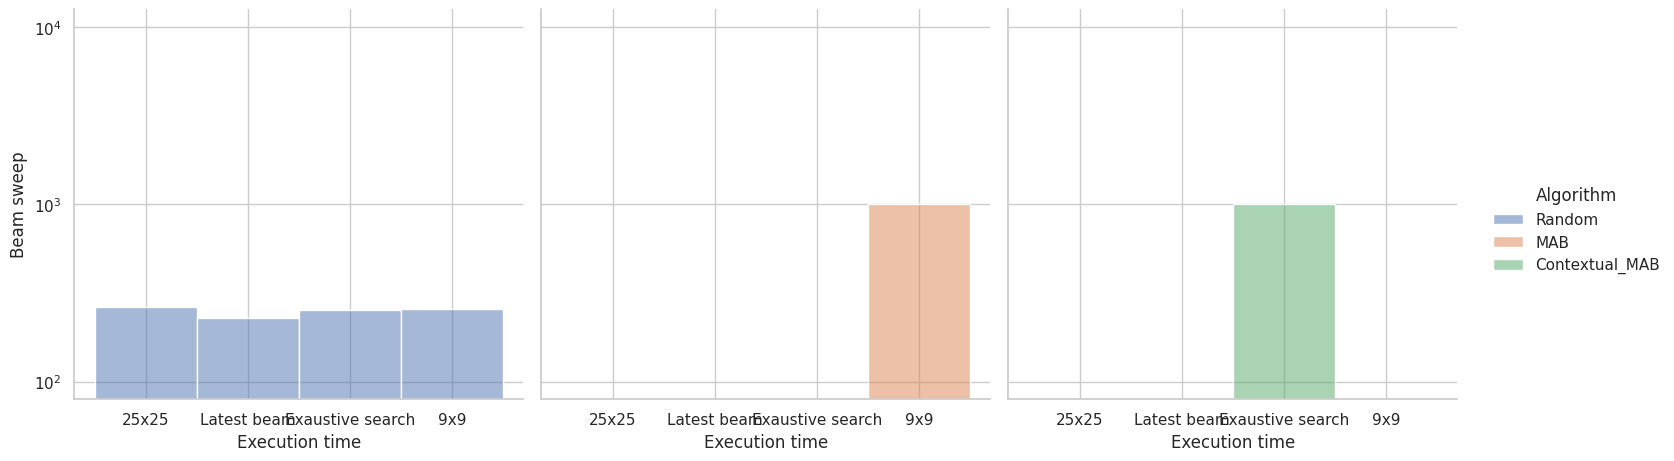

In [ ]:
sns.set(style="whitegrid")
g = sns.displot(data=measurements, x="strategy_str", hue="type_str", col="type_str", log_scale=(False, True))
g.set(ylabel="Beam sweep", xlabel="Execution time", title="")
g.legend.set_title("Algorithm")

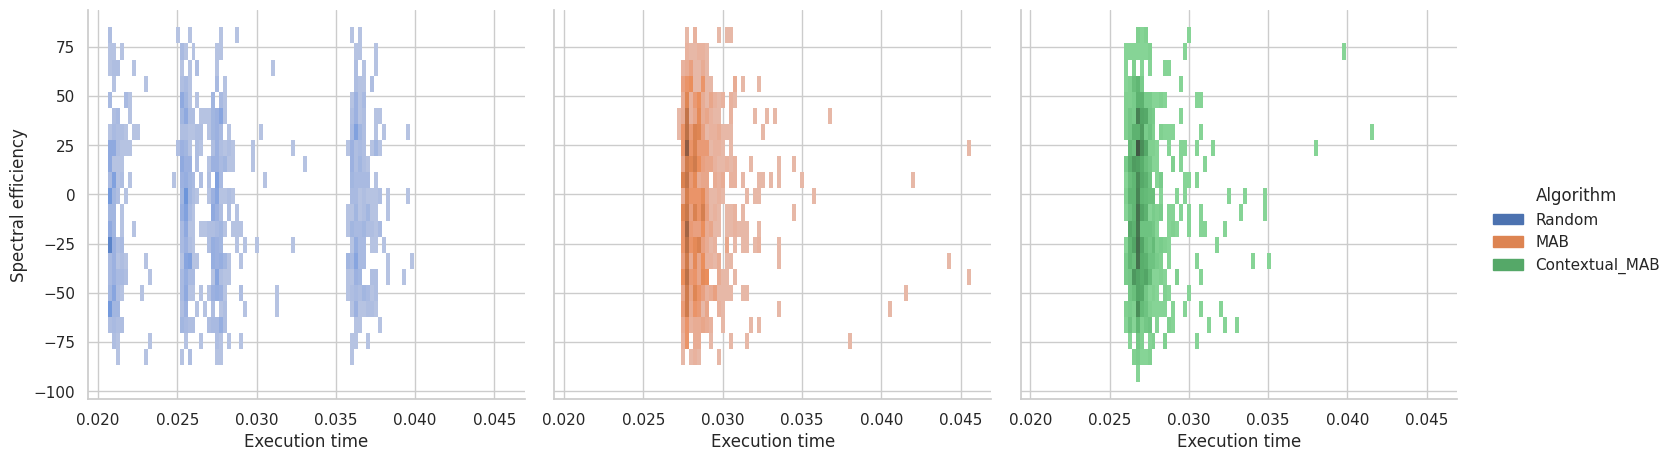

In [ ]:
sns.set(style="whitegrid")
g = sns.displot(data=measurements,x="ts_diff", y="spectral_efficiency", hue="type_str", col="type_str", )
g.set(ylabel="Spectral efficiency", xlabel="Execution time", title="")
g.legend.set_title("Algorithm")
plt.show(g)

[Text(0, 0.5, 'spectral efficiency'),
 Text(0.5, 0, 'distance'),
 Text(0.5, 1.0, '')]

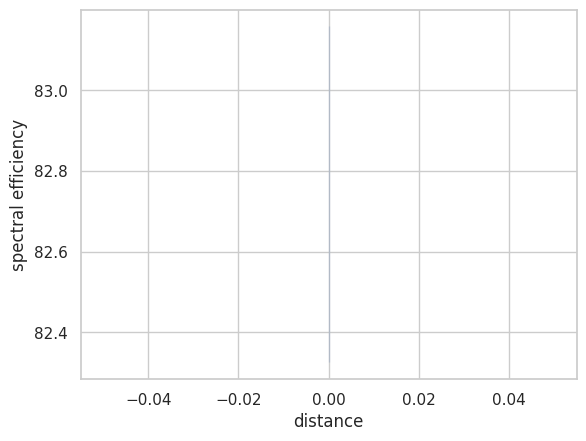

In [ ]:
g = sns.lineplot(data=measurements, x="ty", y="spectral_efficiency")
g.set(ylabel="spectral efficiency", xlabel="distance", title="")

In [ ]:
total = 0
increment = 0
for i in measurements.loc[:"type","differential"]:
    total = total + measurements.loc[increment].at["differential"]
    increment = increment+1

print(total/2000)
 


0.0009388766288757325


In [ ]:
total = 0
increment = 0
for i in measurements.loc[:"ma","differential"]:
    total = total + measurements.loc[increment].at["differential"]
    increment = increment+1

print(total/2000)

0.0009388766288757325


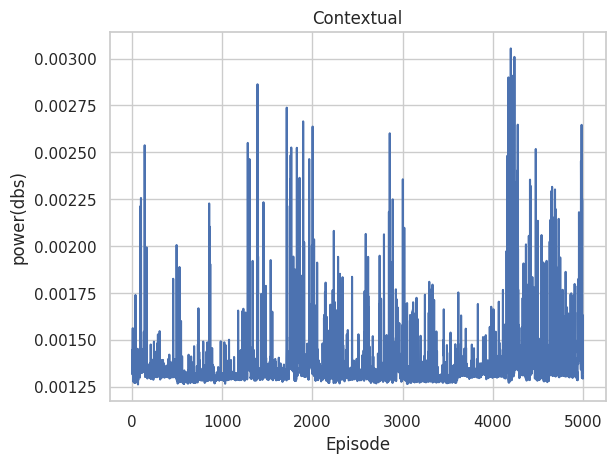

In [ ]:
g = sns.lineplot(data=measurements,x="episode", y="differential")
g.set(ylabel="power(dbs)", xlabel="Episode", title="Contextual")
plt.show(g)

In [ ]:
# Training MAB
eps=0.1
mab_agent = eps_bandit(k=4, eps=eps, iters=training_episodes) 

for i in range(training_episodes): 
    action = mab_agent.act(eps)
    _ , r, _ , _ = env.step(action=action, move= True)

    # Collect reward.
    mab_agent.learn(reward=r, action=action) 

# Training Contextual MAB    
eps=0.1
lr= 0.15
contextual_agent = contextual_bandit(k=4, eps=eps, iters=training_episodes, hidden_size=32, 
    state_size=3, learning_rate=lr)  

for i in range(training_episodes): 
    flat_state = np.array([env.state[0][0][0],env.state[1],env.state[2]])
    action = contextual_agent.act(flat_state)
    _ , r, _ , _ = env.step(action=action, move= True)

    # Collect reward.
    contextual_agent.learn(reward=r, state=flat_state, action=action) 

In [ ]:
import torch
from torch import optim

print(contextual_agent.neuralNet.state_dict())


OrderedDict([('net.0.weight', tensor([[ 1.6031e+02, -2.2562e+01,  3.5859e-01],
        [ 1.6043e+02, -2.0553e+01,  1.1959e-01],
        [ 1.5868e+02, -1.0818e+01,  5.6105e-01],
        [-8.9709e+01,  1.5505e+02, -8.6201e-02],
        [ 1.6141e+02, -2.1190e+01,  4.0168e-02],
        [ 1.5996e+02, -2.0711e+01, -1.8590e-01],
        [ 1.5741e+02, -2.2911e+01,  5.4196e-01],
        [ 1.5895e+02, -2.4551e+01,  3.6978e-01],
        [ 1.5830e+02, -2.4319e+01, -1.0669e-01],
        [ 1.4943e+02, -4.6430e+01, -3.0788e-01],
        [-1.1877e+02,  1.4220e+02,  1.2432e-01],
        [-1.8124e+02,  5.8310e+01, -2.6426e-01],
        [ 1.5788e+02, -7.6546e+00,  2.6956e-01],
        [ 1.5841e+02, -2.0798e+01, -5.1457e-01],
        [ 1.5780e+02, -2.2255e+01,  3.0506e-01],
        [-1.8146e+02,  5.8280e+01, -1.6709e-01],
        [-8.3111e+01,  1.5667e+02,  1.8665e-01],
        [-1.8180e+02,  5.7579e+01,  4.8971e-01],
        [ 1.5919e+02, -2.2391e+01, -3.1035e-01],
        [ 1.2110e+02,  7.6417e+01,  1.3

In [ ]:
for param_tensor in contextual_agent.neuralNet.state_dict():
    print(param_tensor, "\t", contextual_agent.neuralNet.state_dict()[param_tensor].size)

net.0.weight 	 <built-in method size of Tensor object at 0x7fa8b6182c70>
net.0.bias 	 <built-in method size of Tensor object at 0x7fa8c1c5d7c0>
net.2.weight 	 <built-in method size of Tensor object at 0x7fa8b451edb0>
net.2.bias 	 <built-in method size of Tensor object at 0x7fa8c1c5d7c0>
net.4.weight 	 <built-in method size of Tensor object at 0x7fa8b61220e0>
net.4.bias 	 <built-in method size of Tensor object at 0x7fa8b6182900>
net.6.weight 	 <built-in method size of Tensor object at 0x7fa8b6122360>
net.6.bias 	 <built-in method size of Tensor object at 0x7fa8b6182bd0>
net.8.weight 	 <built-in method size of Tensor object at 0x7fa8b6178c70>
net.8.bias 	 <built-in method size of Tensor object at 0x7fa8b61782c0>
net.10.weight 	 <built-in method size of Tensor object at 0x7fa8b61789a0>
net.10.bias 	 <built-in method size of Tensor object at 0x7fa8b61782c0>


In [ ]:
contextual_agent.neuralNet

DQN(
  (net): Sequential(
    (0): Linear(in_features=3, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=64, bias=True)
    (7): ReLU()
    (8): Linear(in_features=64, out_features=32, bias=True)
    (9): ReLU()
    (10): Linear(in_features=32, out_features=4, bias=True)
  )
)

In [ ]:
torch.save(contextual_agent.neuralNet.state_dict(),"/home/adrian/RLEXPMOD/RLEXPMOD")

In [ ]:
torch.save(contextual_agent, "/home/adrian/RLEXPMOD/RLEXPMOD")

In [ ]:
from actorcritic
contextual_agent.neuralNet.eval()

In [ ]:
torch.save(contextual_agent.neuralNet.state_dict(), "/home/adrian/RLEXPMOD/readableversion")

In [ ]:
model = contextual_agent
print(model)

In [ ]:
optimizer = optim.SGD(contextual_agent.neuralNet.parameters(), lr = 0.15, momentum=0.9)

In [ ]:
print(optimizer.state_dict())

In [ ]:
File = "model.pth"
torch.save(model, File)
model = torch.load(File)

for param in contextual_agent.neuralNet.parameters():
    print(param)

In [ ]:
pip install onnx onnxruntime

In [ ]:
import io
import numpy as np
from torch import nn
import torch.utils.model_zoo as model_zoo
import torch.onnx